In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This notebook is for starting with `panel_data_1min.parquet` (from Marius) and build the `stock_prices_csv` file, for clustering.

In [ ]:
data_local = "../../FBD_local_data/"
data_repo = "../Data/"

In [ ]:
# ==== IMPORT THE FILE FROM DESKTOP AND SAVE IN REPO ====
#df_panel1min = pd.read_parquet("../panel_data_1min.parquet")
# save as csv
#df_panel1min.to_csv("df_panel1min.csv", index=False)

# ==== LOAD IT FROM REPO ====
df_panel1min = pd.read_csv(data_local + "df_panel1min.csv")

In [5]:
display(df_panel1min)

,timestamp,ticker,ask-price,ask-volume,bid-price,bid-volume,spread,mid-price,volume_imbalance,industry
0,2008-09-02 13:30:00,ABT,58.537504,605.0,58.309401,484.0,0.228103,58.423452,-0.111111,healthcare
1,2008-09-02 13:30:00,ALL,45.757730,163.0,45.637612,67.0,0.120118,45.697671,-0.417391,financials
2,2008-09-02 13:30:00,BAC,33.007500,13393.0,32.955497,8656.0,0.052003,32.981498,-0.214840,financials
3,2008-09-02 13:30:00,BAX,68.484787,328.0,68.272418,153.0,0.212368,68.378602,-0.363825,healthcare
4,2008-09-02 13:30:00,BK,35.365500,280.0,35.302484,153.0,0.063016,35.333992,-0.293303,financials
...,...,...,...,...,...,...,...,...,...,...
2731242,2008-12-30 21:55:00,T,28.240000,1065.0,28.190000,1.0,0.050000,28.215000,-0.998124,communication_services
2731243,2008-12-30 21:55:00,WAG,23.960000,53.0,23.940000,106.0,0.020000,23.950000,0.333333,consumer_defensive
2731244,2008-12-30 21:55:00,WFC,28.820000,1.0,28.700000,59.0,0.120000,28.760000,0.966667,financials
2731245,2008-12-30 21:55:00,WMB,14.330000,415.0,14.310000,606.0,0.020000,14.320000,0.187071,energy


In [6]:
DATA = {}

In [ ]:
# Create a DataFrame of stock prices

# Pivot table
df_pivot = (
    df_panel1min
    .pivot_table(
        index="timestamp",
        columns="ticker",
        values="mid-price",
        aggfunc="last"   # or "mean", "first", etc.
    )
)
# Set index to datetime type
df_pivot.index = pd.to_datetime(df_pivot.index)

# Save DataFrame in master dictionary
DATA["PRICE"] = df_pivot
display(DATA["PRICE"])
TICKERS = DATA["PRICE"].columns.to_list()[1:]

# Write csv inn repo
DATA["PRICE"].to_csv(data_repo + "stock_prices.csv")


ticker,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,58.423452,NaN,45.697671,NaN,NaN,NaN,NaN,32.981498,68.378602,NaN,...,66.631589,77.038873,35.840726,36.933270,31.451769,NaN,60.076032,56.731888,78.190018,NaN
2008-09-02 13:31:00,58.486896,39.602787,45.781989,NaN,43.477229,41.148213,67.934522,32.989938,68.336705,77.442073,...,66.778460,77.225814,35.863855,36.944774,31.498081,30.072193,60.207687,56.637669,78.180793,NaN
2008-09-02 13:32:00,58.495018,39.537460,45.753183,NaN,43.600090,41.340087,67.902852,32.977620,68.545130,77.455280,...,66.891117,77.176011,35.854129,37.028759,31.509730,29.955143,60.496263,56.571532,77.965061,14.416678
2008-09-02 13:33:00,58.489390,39.508807,45.470182,110.020999,43.555185,41.210122,68.165291,32.929745,68.686580,77.330938,...,66.979880,77.163261,35.868338,37.010264,31.438751,29.659124,60.693427,56.591003,77.819938,14.472406
2008-09-02 13:34:00,58.503328,39.592403,45.322855,109.475934,43.567261,40.957044,67.952471,32.777688,68.718611,77.554391,...,67.082530,77.247565,35.913776,37.027540,31.437492,29.524651,60.818429,56.757591,77.923280,14.479567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-30 21:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-30 21:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.760000,NaN,NaN,NaN,NaN,NaN
2008-12-30 21:38:00,53.180000,NaN,NaN,73.660000,NaN,NaN,NaN,13.220000,52.740000,31.945000,...,53.070000,NaN,33.200000,NaN,NaN,NaN,NaN,NaN,NaN,7.720000


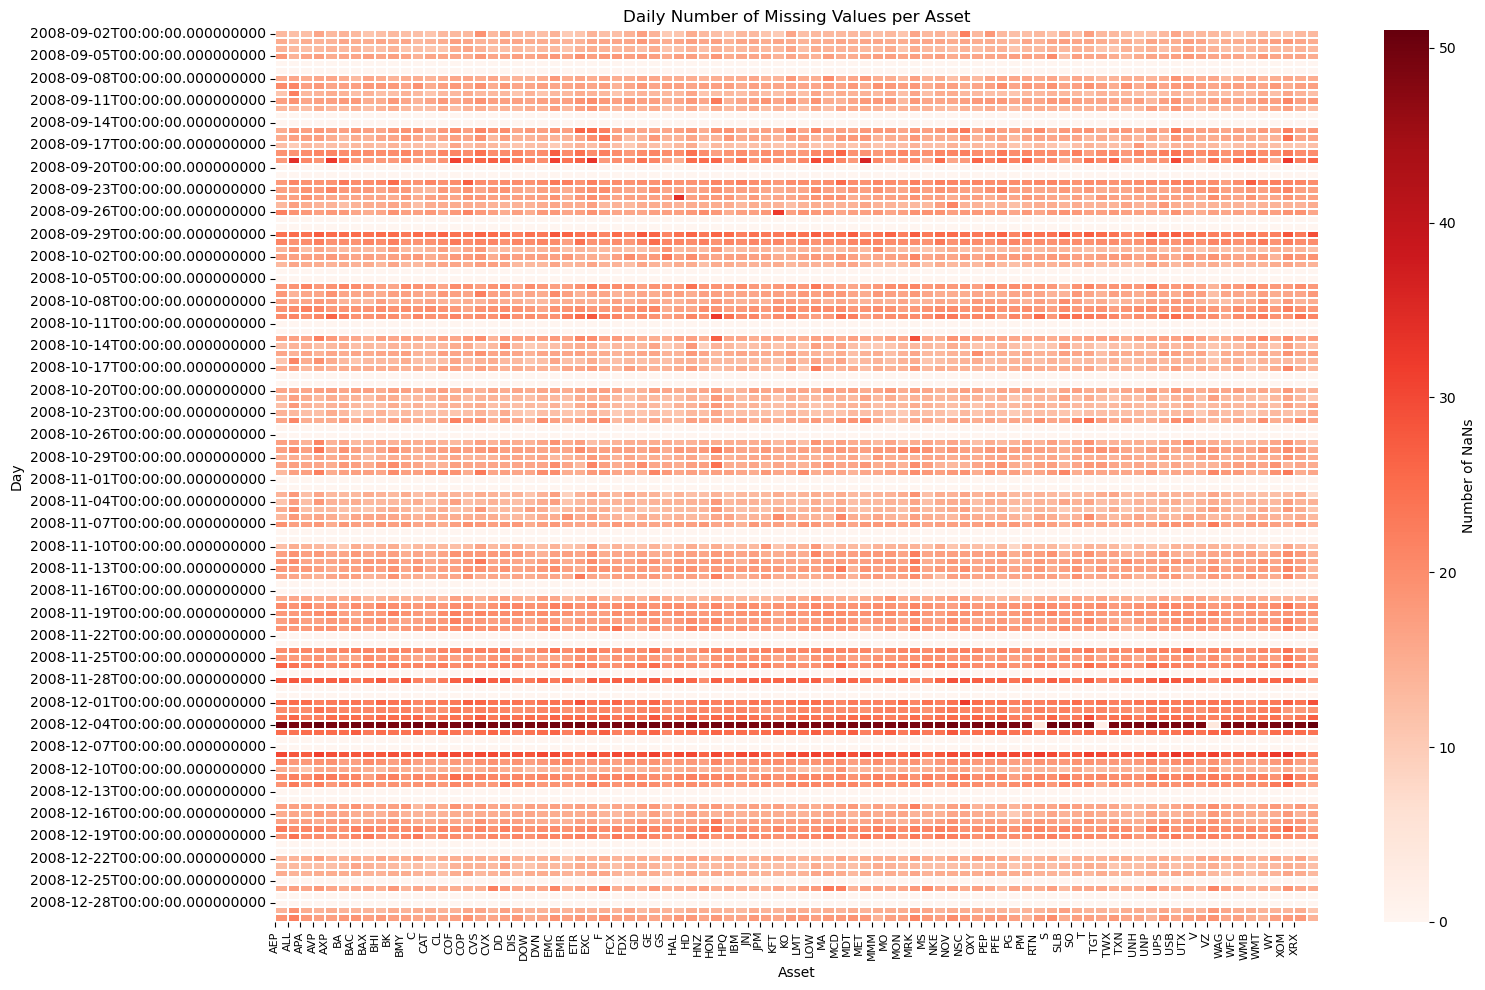

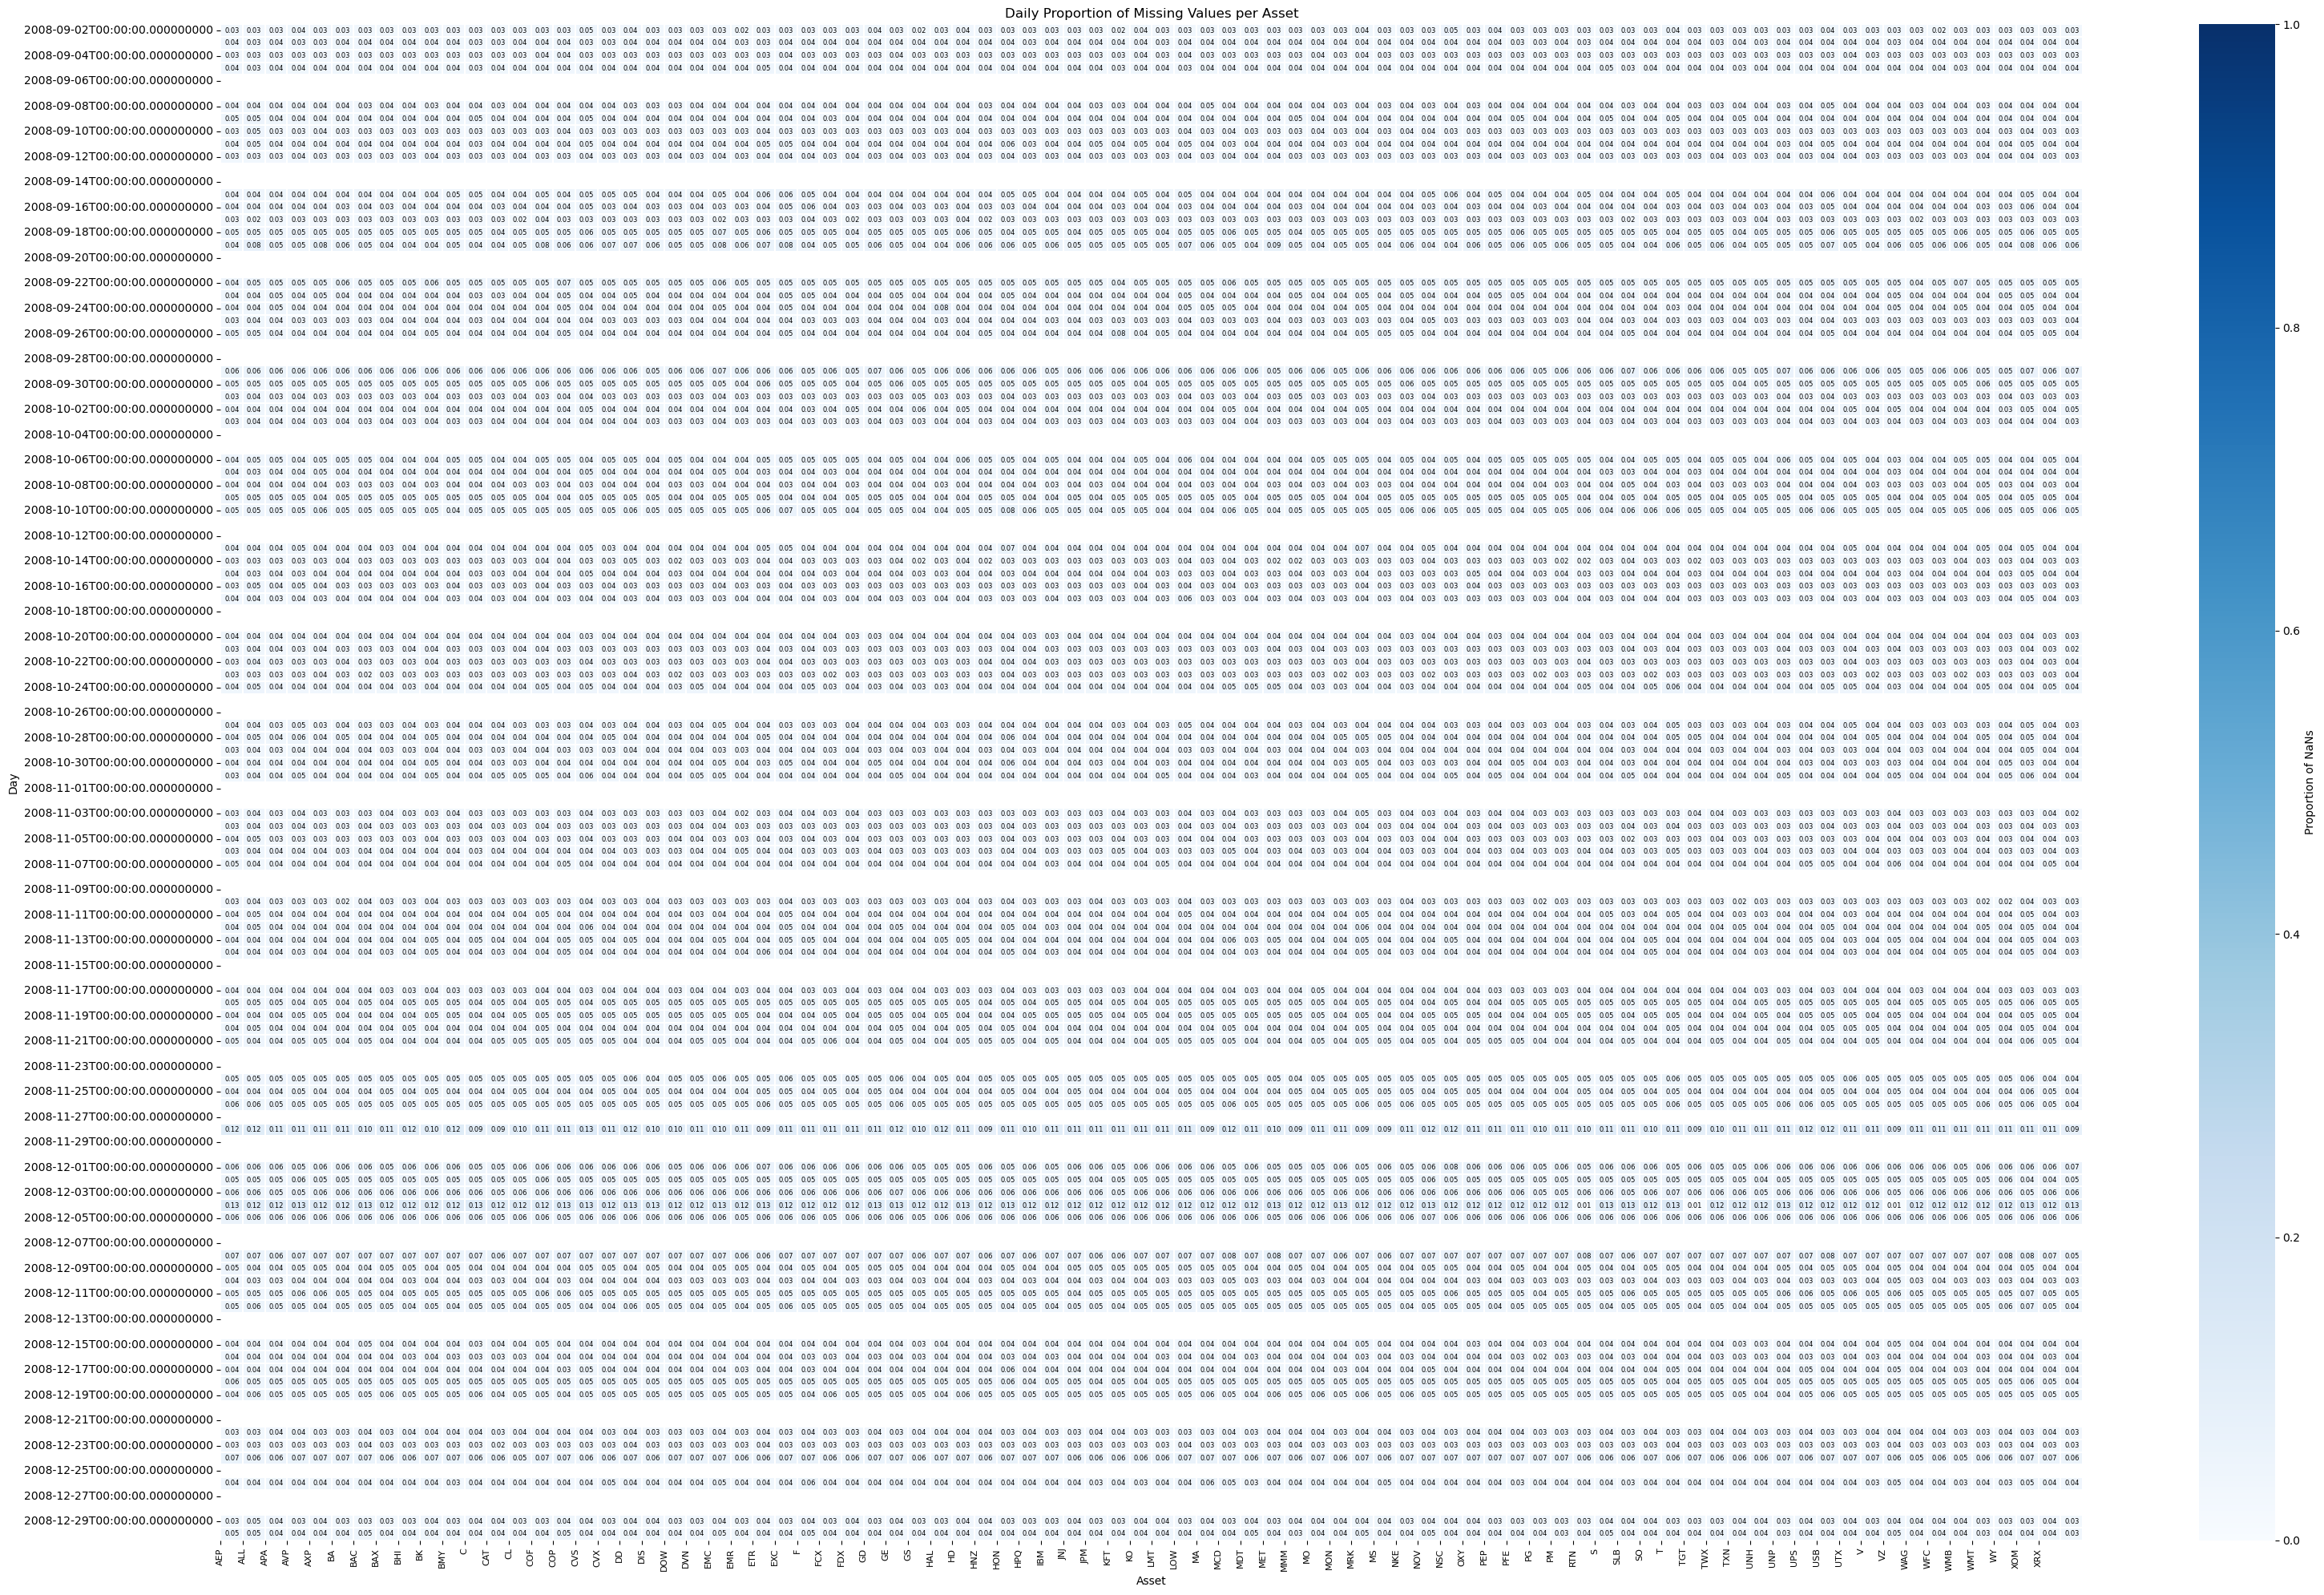

In [20]:
def plot_weekly_nan_proportion_heatmap(df_wide):
    """
    Plots a heatmap showing the number of NaNs per asset per day.
    Plots a heatmap showing the proportion of NaNs per asset per day.
    
    Parameters
    ----------
    df_wide : pd.DataFrame
        Wide dataframe with timestamps and asset columns.
        Timestamp must be the index.
    """

    df = df_wide.copy()

    # Ensure timestamp is datetime index
    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df = df.set_index("timestamp")
    else:
        df.index = pd.to_datetime(df.index)

    # ==== Count NaNs per week per asset ====
    weekly_nan_counts = (
        df
        .isna()
        .resample("D")
        .sum()
    )
    # Plot heatmap 
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        weekly_nan_counts,
        cmap="Reds",
        cbar_kws={"label": "Number of NaNs"},
        linewidths=0.2
    )
    plt.xlabel("Asset")
    plt.xticks(np.arange(len(TICKERS)), TICKERS, fontsize = 8)
    plt.ylabel("Day")
    plt.title("Daily Number of Missing Values per Asset")
    plt.tight_layout()
    plt.show()

    # ==== Compute weekly NaN proportion ====
    weekly_nan_proportion = (
        df
        .isna()
        .resample("D")
        .mean()   # mean of boolean = proportion
    )
    # Plot heatmap
    plt.figure(figsize=(32, 20))
    sns.heatmap(
        weekly_nan_proportion,
        cmap="Blues",
        cbar_kws={"label": "Proportion of NaNs"},
        vmin=0,
        vmax=1,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 6, "color": "black"},
        linewidths=0.2
    )
    plt.xlabel("Asset")
    plt.xticks(np.arange(len(TICKERS)), TICKERS, fontsize = 8)
    plt.ylabel("Day")
    plt.title("Daily Proportion of Missing Values per Asset")
    plt.tight_layout()
    plt.show()


plot_weekly_nan_proportion_heatmap(DATA["PRICE"])